### <a name="model">Modelling</a>

### <a name="train-test">Train/Test Split </a>

In [ ]:
def stratified_train_test_split(X, y, split_ratio=0.7, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    class_indices = {}

    for class_label in np.unique(y):
        class_indices[class_label] = np.where(y == class_label)[0]

    train_indices = []
    test_indices = []

    # Performing stratified sampling
    for class_label, indices in class_indices.items():
        np.random.shuffle(indices)
        split_idx = int(len(indices) * split_ratio)
        train_indices.extend(indices[:split_idx])
        test_indices.extend(indices[split_idx:])

    # Spliting the data into training and test sets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
X = df.drop('Risk', 1).values #independent variables
y = df["Risk"].values #target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
df1=df.copy()

<ipython-input-39-4ffe5fd68011>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Risk', 1).values #independent variables


# (Model 1) Perceptron


The learning process of a perceptron involves iteratively updating its weights and bias to minimize classification errors. During each epoch of training, the perceptron processes each training sample, computing a linear output by taking the dot product of the input features with the weights and adding the bias. The predicted class is determined using a binary step function, assigning 1 if the linear output is greater than or equal to zero and 0 otherwise. The perceptron then adjusts its weights and bias based on the difference between the predicted class and the true class, multiplied by the learning rate. This adjustment process continues for a specified number of iterations. The learning rate influences the size of weight and bias updates, impacting the convergence speed and stability of the learning process. The perceptron aims to find a decision boundary, a hyperplane in the input space, that separates different classes, and through this iterative learning process, it adapts to the underlying patterns in the training data.



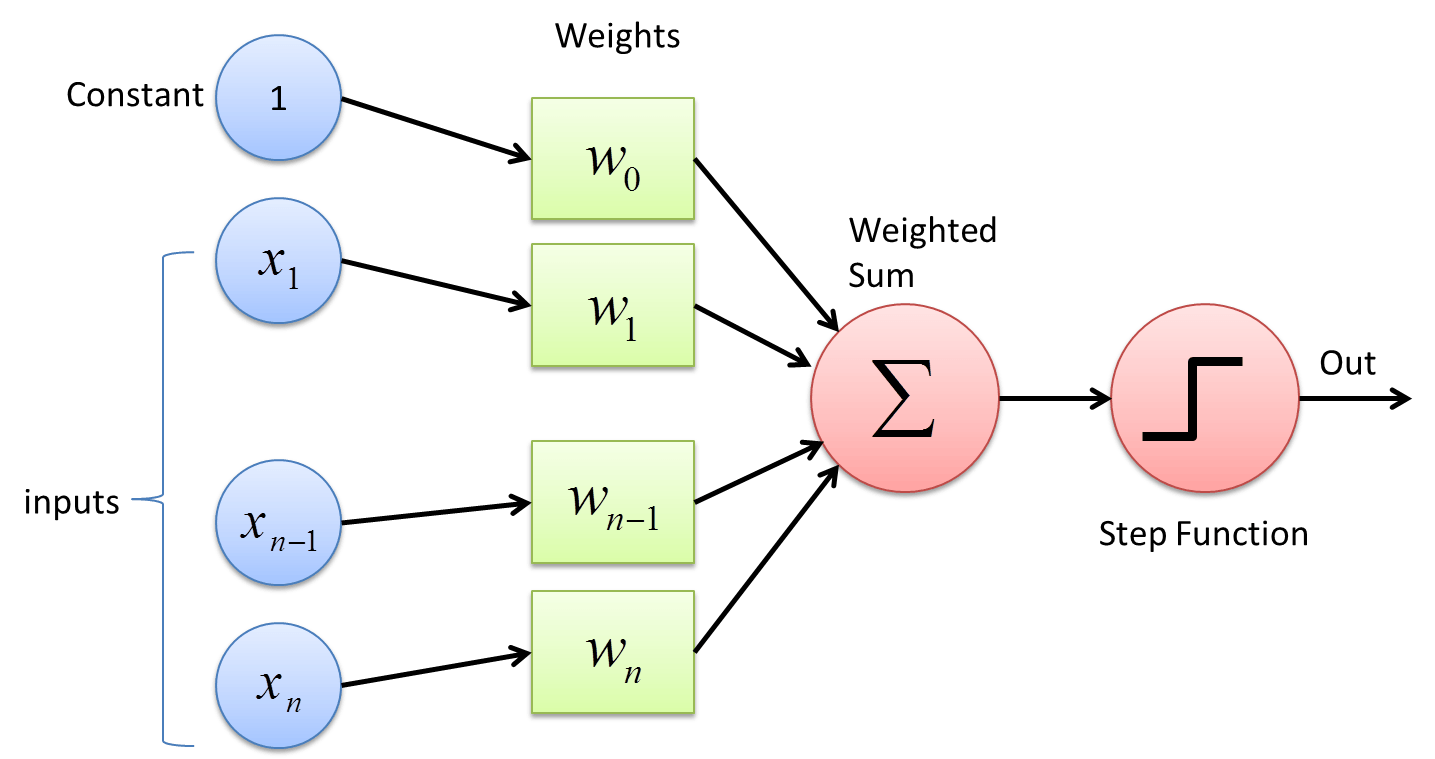




The process can be described as:

1. Linear Output Calculation:

$$linear\_output = \sum_{i = 1}^{n} weights[i] * input[i] + bias$$

2. Activation Function (Binary Step):

$$y\_pred = \begin{cases}
1, & \text{if } \text{linear_output} \geq 0 \\
0, & \text{otherwise}
\end{cases}$$

3. Weight Update:

$$update = learning\_rate * (true\_class - y\_pred)$$


$$weights[i]\ += update\ *\ input[i]\   for\ each\ i $$

4. Bias Update:

$$bias += update$$



In [ ]:
class Perceptron:
    #constructor to initialize variables
    def __init__(self, lr=0.01, n_iters=10000):
        # Initializing the learning rate and number of iterations
        self.lr = lr  # Learning rate: determines the step size in updating weights
        self.n_iters = n_iters  # Number of iterations: epochs for training the model
        self.weights = None  # Weights: parameters for each feature
        self.bias = None  # Bias or threshold for the model

    #function to fit perceptron on training data
    def fit(self, X, y):
        # Initializing weights and bias to zeros
        # Get the number of samples and features
        n_samples, n_features = X.shape
        # Initializing weights as zeros
        self.weights = np.zeros(n_features)
        # Initializing bias as zero
        self.bias = 0

        # Training the model for n_iter epochs
        for _ in range(self.n_iters):  # Looping through the specified number of iterations
            # Iterating over all samples and update the weights and bias
            for idx, x_i in enumerate(X):  # Iterate through each sample and its index
                # Calculating the linear output
                # output is weighted sum + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predicting the classes based on the linear output
                y_pred = 1 if linear_output >= 0 else 0
                # Calculating the updated value based on the prediction and actual class
                update = self.lr * (y[idx] - y_pred)

                # Updating weights: Adjusting the weights based on the update value and input
                self.weights += update * x_i

                # Updating bias: Adjusting the bias based on the update value
                self.bias += update

    #function to predict the classes
    def predict(self, X):
        # Calculating the linear output and return the predicted class
        linear_output = np.dot(X, self.weights) + self.bias
        # Converting the linear output to predicted classes (0 or 1)
        y_pred = np.where(linear_output >= 0, 1, 0)
        return y_pred


In [ ]:
#creating the model
model = Perceptron(lr=0.001, n_iters=2500)
#fitting the model
model.fit(X_train, y_train)
#finding predictions
predictions = model.predict(X_test)
#calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 74.00%
